In [1]:
import pandas as pd
import numpy as np
import nltk, string, emoji, re
from pandas import DataFrame
import re

## Membaca Data set Game Call of Duty

In [2]:
df_COD = pd.read_csv(r'C:\Users\Asani\Python\.vscode\Tugas\scrapped_data_COD.csv')

df_COD

,userName,score,at,content
0,Rezky kurnia,1,2023-06-21 19:36:14,Terlalu sangat banyakan update gak jelasnya pe...
1,Nana Prasetya,5,2023-06-21 19:26:23,Game ini salah satu gem favorit ku gemnya kere...
2,Geraldo Wowiling,3,2023-06-21 18:55:13,"Gamenya udh bagus sebenarnya semuanya bagus ""K..."
3,Liya Triana,2,2023-06-21 16:17:17,Nyari musuh tolong yang sepantar skill nya
4,Fendinata Rahman Hakim,1,2023-06-21 16:07:48,Pemilihan tim tidak sesuai sekil dibawah saya ...
...,...,...,...,...
4995,Pengguna Google,4,2019-09-30 21:50:11,"Bagus, ada beberapa masukan, contoh seperti da..."
4996,Pengguna Google,4,2019-09-30 20:05:55,"Good game, tingkat kan lagi, senjata lebih dip..."
4997,Pengguna Google,5,2019-09-30 19:36:29,"Orang tolol yang asal rate kecil, mereka gada ..."
4998,Pengguna Google,5,2019-09-30 19:23:03,Untuk Dari Game Garena ini sendiri udah bagus ...


## Membaca Data set Game Free Fire

In [3]:
df_FF = pd.read_csv(r'C:\Users\Asani\Python\.vscode\Tugas\scrapped_data_FF.csv')

df_FF

,userName,score,at,content
0,Phyta Rayhn,1,2023-06-21 20:28:07,Tolong game di ringan kan lagi karena kasihan ...
1,Komang Edirestawan,2,2023-06-21 20:24:05,"membaca info game aja terus ,,padahal sinyal b..."
2,Sofyan Uchup,2,2023-06-21 20:11:17,Setelah di update sinyal kok gak stabil sih .....
3,Nasywan Farrel,5,2023-06-21 20:06:35,Update terus Semua bug ndak di urus Jaringanny...
4,Baim Aja,1,2023-06-21 20:04:48,Gada guna updet terus kita kalo main CSR dapet...
...,...,...,...,...
4995,gusto temaluru,1,2023-01-11 17:32:08,Tolong di perbaiki lagi tentang bug di luar zo...
4996,ANM Gmg,5,2023-01-11 17:15:47,Untuk pihak Garena Free Fire Indonesia...Tolon...
4997,Adam,5,2023-01-11 17:07:45,Jangan terlalu ada banyak alasan masalah pada ...
4998,Ferry Martua Sitorus,4,2023-01-11 16:00:23,Saya mau kasih tahu buat garena free fire. Upd...


## Membaca Data set Game PUBG

In [4]:
df_PUBG = pd.read_csv(r"C:\Users\Asani\Python\.vscode\Tugas\scrapped_data_PUBG.csv")

df_PUBG

,userName,score,at,content
0,Ilyas Rouf,2,2023-06-21 20:29:06,Saya sering saat loading ke in game kembali ke...
1,Abdi Bayuツ,4,2023-06-21 20:00:57,"Bagus lah selama ini,tapi peta Livik masih har..."
2,Omen Zipacy,5,2023-06-21 19:40:31,Mohon diperhatikan karena saya tidak bisa logi...
3,Umar Airmas,1,2023-06-21 19:19:56,Gamenya terlalu lama loadingnya bikin ga suka ...
4,Indra Gunawan,2,2023-06-21 18:58:45,Kirain setelah di kasih ulasan game nya lebih ...
...,...,...,...,...
4995,Pengguna Google,2,2018-09-18 17:46:10,semakin lama game ini semakin tidak berkualita...
4996,Pengguna Google,1,2018-09-17 22:57:00,Banyak lag nya setelah update. Grafis dah pali...
4997,Pengguna Google,5,2018-09-15 12:29:36,Knapa sekarang suka dan sering kluar sendiri n...
4998,Pengguna Google,1,2018-09-14 17:57:08,"Pertama sebelum upgrade bagus, sekarang setela..."


## Mendefinisikan Cleaning tex pada kolom konten

In [5]:
import re

def remove_repeated_letters(text):
    pattern = r'(\w)\1{2,}'
    clean_text = re.sub(pattern, '', text)
    return clean_text

def remove_repeated_punctuation(text):
    pattern = r'([^\w\s])\1+'
    clean_text = re.sub(pattern, r'\1', text)
    return clean_text

def cleaning_text(text):
    # hapus tab, newline, dan backslash
    tab = text.replace('\t', ' ').replace('\n', ' ').replace('\\', ' ')
    # hapus underscore
    score = tab.replace('_', '')
    # hapus user mention
    user = re.sub('@[A-Za-z0-9]+', '', score)
    # menghapus angka
    no = re.sub('[0-9]+', '', user)
    # menghapus slang
    slang = re.sub(r'\\n', ' ', no)
    # menghapus regex
    reg = re.sub("b'", ' ', slang)
    # menghapus emoticon
    cleaned_text = re.sub(r'[^\w\s,]', '', reg)
    cleaned_text = cleaned_text.strip()
    # Menghapus huruf berulang
    cleaned_text = remove_repeated_letters(cleaned_text)
    # Menghapus tanda baca berulang
    cleaned_text = remove_repeated_punctuation(cleaned_text)
    
    return cleaned_text


## Mengaplikasikan Cleaning text sekaligus Menggabungkan kolom baru ke dalam data frame

In [6]:
df_COD = df_COD.assign(cleaned_text=df_COD["content"].apply(cleaning_text))

df_COD

,userName,score,at,content,cleaned_text
0,Rezky kurnia,1,2023-06-21 19:36:14,Terlalu sangat banyakan update gak jelasnya pe...,Terlalu sangat banyakan update gak jelasnya pe...
1,Nana Prasetya,5,2023-06-21 19:26:23,Game ini salah satu gem favorit ku gemnya kere...,Game ini salah satu gem favorit ku gemnya kere...
2,Geraldo Wowiling,3,2023-06-21 18:55:13,"Gamenya udh bagus sebenarnya semuanya bagus ""K...",Gamenya udh bagus sebenarnya semuanya bagus KE...
3,Liya Triana,2,2023-06-21 16:17:17,Nyari musuh tolong yang sepantar skill nya,Nyari musuh tolong yang sepantar skill nya
4,Fendinata Rahman Hakim,1,2023-06-21 16:07:48,Pemilihan tim tidak sesuai sekil dibawah saya ...,Pemilihan tim tidak sesuai sekil dibawah saya ...
...,...,...,...,...,...
4995,Pengguna Google,4,2019-09-30 21:50:11,"Bagus, ada beberapa masukan, contoh seperti da...","Bagus, ada beberapa masukan, contoh seperti da..."
4996,Pengguna Google,4,2019-09-30 20:05:55,"Good game, tingkat kan lagi, senjata lebih dip...","Good game, tingkat kan lagi, senjata lebih dip..."
4997,Pengguna Google,5,2019-09-30 19:36:29,"Orang tolol yang asal rate kecil, mereka gada ...","Orang tolol yang asal rate kecil, mereka gada ..."
4998,Pengguna Google,5,2019-09-30 19:23:03,Untuk Dari Game Garena ini sendiri udah bagus ...,Untuk Dari Game Garena ini sendiri udah bagus ...


In [7]:
df_FF = df_FF.assign(cleaned_text=df_FF["content"].apply(cleaning_text))

df_FF

,userName,score,at,content,cleaned_text
0,Phyta Rayhn,1,2023-06-21 20:28:07,Tolong game di ringan kan lagi karena kasihan ...,Tolong game di ringan kan lagi karena kasihan ...
1,Komang Edirestawan,2,2023-06-21 20:24:05,"membaca info game aja terus ,,padahal sinyal b...","membaca info game aja terus ,padahal sinyal ba..."
2,Sofyan Uchup,2,2023-06-21 20:11:17,Setelah di update sinyal kok gak stabil sih .....,Setelah di update sinyal kok gak stabil sih T...
3,Nasywan Farrel,5,2023-06-21 20:06:35,Update terus Semua bug ndak di urus Jaringanny...,Update terus Semua bug ndak di urus Jaringanny...
4,Baim Aja,1,2023-06-21 20:04:48,Gada guna updet terus kita kalo main CSR dapet...,Gada guna updet terus kita kalo main CSR dapet...
...,...,...,...,...,...
4995,gusto temaluru,1,2023-01-11 17:32:08,Tolong di perbaiki lagi tentang bug di luar zo...,Tolong di perbaiki lagi tentang bug di luar zo...
4996,ANM Gmg,5,2023-01-11 17:15:47,Untuk pihak Garena Free Fire Indonesia...Tolon...,Untuk pihak Garena Free Fire IndonesiaTolong P...
4997,Adam,5,2023-01-11 17:07:45,Jangan terlalu ada banyak alasan masalah pada ...,Jangan terlalu ada banyak alasan masalah pada ...
4998,Ferry Martua Sitorus,4,2023-01-11 16:00:23,Saya mau kasih tahu buat garena free fire. Upd...,Saya mau kasih tahu buat garena free fire Upda...


In [8]:
df_PUBG = df_PUBG.assign(cleaned_text=df_PUBG["content"].apply(cleaning_text))

df_PUBG

,userName,score,at,content,cleaned_text
0,Ilyas Rouf,2,2023-06-21 20:29:06,Saya sering saat loading ke in game kembali ke...,Saya sering saat loading ke in game kembali ke...
1,Abdi Bayuツ,4,2023-06-21 20:00:57,"Bagus lah selama ini,tapi peta Livik masih har...","Bagus lah selama ini,tapi peta Livik masih har..."
2,Omen Zipacy,5,2023-06-21 19:40:31,Mohon diperhatikan karena saya tidak bisa logi...,Mohon diperhatikan karena saya tidak bisa logi...
3,Umar Airmas,1,2023-06-21 19:19:56,Gamenya terlalu lama loadingnya bikin ga suka ...,Gamenya terlalu lama loadingnya bikin ga suka ...
4,Indra Gunawan,2,2023-06-21 18:58:45,Kirain setelah di kasih ulasan game nya lebih ...,Kirain setelah di kasih ulasan game nya lebih ...
...,...,...,...,...,...
4995,Pengguna Google,2,2018-09-18 17:46:10,semakin lama game ini semakin tidak berkualita...,semakin lama game ini semakin tidak berkualita...
4996,Pengguna Google,1,2018-09-17 22:57:00,Banyak lag nya setelah update. Grafis dah pali...,Banyak lag nya setelah update Grafis dah palin...
4997,Pengguna Google,5,2018-09-15 12:29:36,Knapa sekarang suka dan sering kluar sendiri n...,Knapa sekarang suka dan sering kluar sendiri n...
4998,Pengguna Google,1,2018-09-14 17:57:08,"Pertama sebelum upgrade bagus, sekarang setela...","Pertama sebelum upgrade bagus, sekarang setela..."


## Melakukan drop pada kolom Content pada setiap data frame

In [9]:
df_COD  = df_COD.drop('content', axis=1)
df_FF   = df_FF.drop('content', axis=1)
df_PUBG = df_PUBG.drop('content', axis=1)

# Mengubah kolom at dengan format berbeda

In [10]:
df_COD['at'] = pd.to_datetime(df_COD['at']).dt.date
df_FF['at']  = pd.to_datetime(df_FF['at']).dt.date
df_PUBG['at']= pd.to_datetime(df_PUBG['at']).dt.date

## Melihat Missing value menggunakan Jcopml

In [11]:
combined_df = pd.concat([df_COD.add_suffix('_COD'), df_FF.add_suffix('_FF'), df_PUBG.add_suffix('_PUBG')], axis=1)

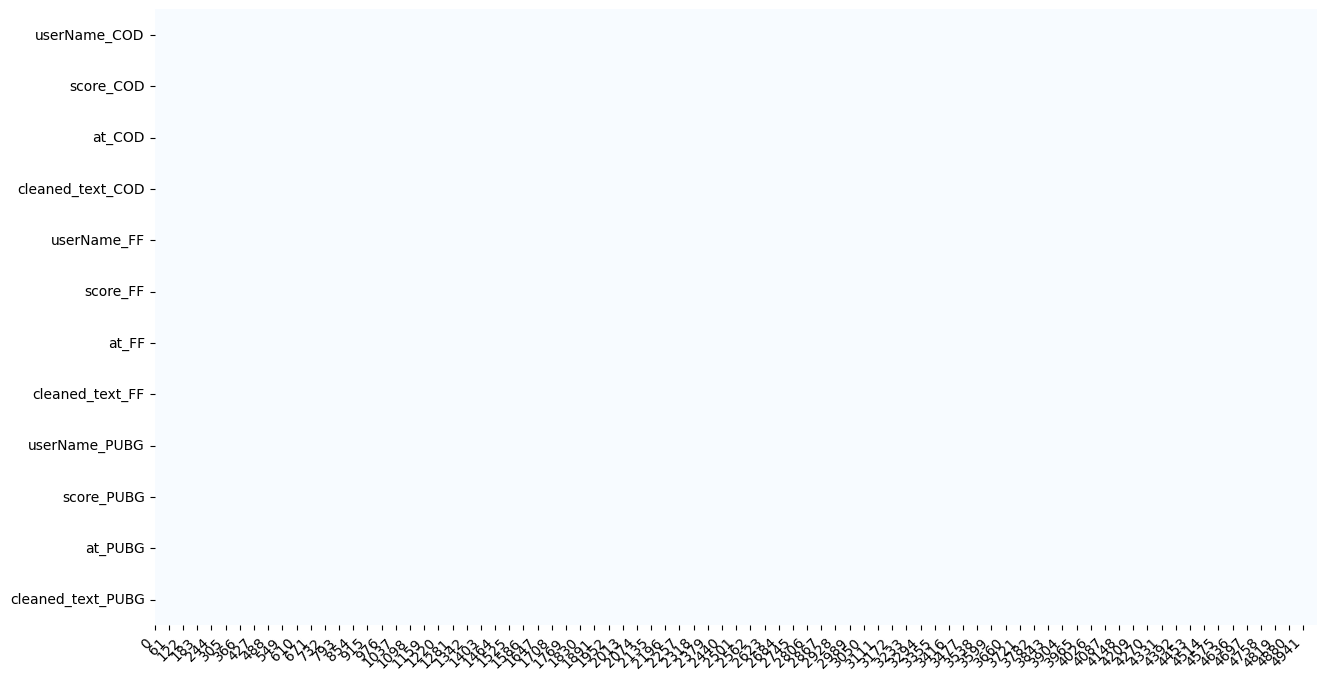

In [12]:
from jcopml.plot import plot_missing_value

plot_missing_value(combined_df)


## Mengubah huruf besar menjadi huruf kecil menggunakan fungsi lowercase 

In [13]:
def lowercase():
    lower_word = df_COD['cleaned_text'].str.lower()
    return lower_word

lower_text_COD = lowercase()

print(lower_text_COD)

0       terlalu sangat banyakan update gak jelasnya pe...
1       game ini salah satu gem favorit ku gemnya kere...
2       gamenya udh bagus sebenarnya semuanya bagus ke...
3              nyari musuh tolong yang sepantar skill nya
4       pemilihan tim tidak sesuai sekil dibawah saya ...
                              ...                        
4995    bagus, ada beberapa masukan, contoh seperti da...
4996    good game, tingkat kan lagi, senjata lebih dip...
4997    orang tolol yang asal rate kecil, mereka gada ...
4998    untuk dari game garena ini sendiri udah bagus ...
4999    kontrol kurang nyaman dengan sensiyifitas terl...
Name: cleaned_text, Length: 5000, dtype: object


In [14]:
def lowercase():
    lower_word = df_FF['cleaned_text'].str.lower()
    return lower_word

lower_text_FF = lowercase()

print(lower_text_FF)

0       tolong game di ringan kan lagi karena kasihan ...
1       membaca info game aja terus ,padahal sinyal ba...
2       setelah di update sinyal kok gak stabil sih  t...
3       update terus semua bug ndak di urus jaringanny...
4       gada guna updet terus kita kalo main csr dapet...
                              ...                        
4995    tolong di perbaiki lagi tentang bug di luar zo...
4996    untuk pihak garena free fire indonesiatolong p...
4997    jangan terlalu ada banyak alasan masalah pada ...
4998    saya mau kasih tahu buat garena free fire upda...
4999    akhir akhir ini saya sering merasa masalah mac...
Name: cleaned_text, Length: 5000, dtype: object


In [15]:
def lowercase():
    lower_word = df_PUBG['cleaned_text'].str.lower()
    return lower_word

lower_text_PUBG = lowercase()

print(lower_text_PUBG)

0       saya sering saat loading ke in game kembali ke...
1       bagus lah selama ini,tapi peta livik masih har...
2       mohon diperhatikan karena saya tidak bisa logi...
3       gamenya terlalu lama loadingnya bikin ga suka ...
4       kirain setelah di kasih ulasan game nya lebih ...
                              ...                        
4995    semakin lama game ini semakin tidak berkualita...
4996    banyak lag nya setelah update grafis dah palin...
4997    knapa sekarang suka dan sering kluar sendiri n...
4998    pertama sebelum upgrade bagus, sekarang setela...
4999    payah update terbaru malah sering ngelag patah...
Name: cleaned_text, Length: 5000, dtype: object


## Melihat Stop word dari setiap data set

In [16]:
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory

factory = StopWordRemoverFactory()
stopword = factory.create_stop_word_remover()

stopwords_set = set()

# Mengumpulkan daftar stop words dari ketiga dataset
for dataset in [df_COD, df_FF, df_PUBG]:
    for comment in dataset["cleaned_text"]:
        words = comment.split()
        stopwords = [word for word in words if stopword.remove(word) == ""]
        stopwords_set.update(stopwords)

print(stopwords_set)


{'yakni', 'ia', 'kemana', 'kenapa', 'agak', 'bagaimanapun', 'dua', 'bisa', 'mereka', 'demikian', 'saya', 'guna', 'pasti', 'serta', 'dimana', 'terhadap', 'sesudah', 'dll', 'namun', 'setelah', 'kecuali', 'agar', 'nanti', 'dan', 'setidaknya', 'yaitu', 'setiap', 'melainkan', 'akan', 'anda', 'para', 'dahulu', 'seolah', 'sudah', 'dia', 'hanya', 'seperti', 'sebagai', 'lain', 'tidak', 'di', 'ketika', 'oleh', 'seterusnya', 'kami', 'saat', 'sekitar', 'kepada', 'dengan', 'yang', 'ke', 'menurut', 'selain', 'boleh', 'supaya', 'tentang', 'ya', 'lagi', 'apalagi', 'sesuatu', 'telah', 'begitu', 'walau', 'sampai', 'ok', 'juga', 'hal', 'sehingga', 'dst', 'itu', 'sebab', 'antara', 'sebetulnya', 'apakah', 'belum', 'tentu', 'maka', 'saja', 'seharusnya', 'amat', 'dari', 'dalam', 'selagi', 'atau', 'adalah', 'untuk', 'ingin', 'tetapi', 'bahwa', 'sambil', 'ada', 'tolong', 'itulah', 'oh', 'mengapa', 'mari', 'kah', 'harus', 'dapat', 'ini', 'sebelum', 'secara', 'tanpa', 'demi', 'pada', 'pula', 'dsb', 'sementara', 

## Melakukan Remove stopword pada setiap data set

In [17]:
def removeStopWords(text):
    clean_word_list = [word for word in text.split() if word not in stopwords]
    return clean_word_list

stopwords_text_COD = lower_text_COD.apply(removeStopWords)

print(stopwords_text_COD)

0       [terlalu, sangat, banyakan, update, gak, jelas...
1       [game, salah, satu, gem, favorit, ku, gemnya, ...
2       [gamenya, udh, bagus, sebenarnya, semuanya, ba...
3       [nyari, musuh, tolong, yang, sepantar, skill, ...
4       [pemilihan, tim, sesuai, sekil, dibawah, saya,...
                              ...                        
4995    [bagus,, ada, beberapa, masukan,, contoh, dama...
4996    [good, game,, tingkat, kan, lagi,, senjata, le...
4997    [orang, tolol, yang, asal, rate, kecil,, merek...
4998    [untuk, dari, game, garena, sendiri, udah, bag...
4999    [kontrol, kurang, nyaman, dengan, sensiyifitas...
Name: cleaned_text, Length: 5000, dtype: object


In [18]:
def removeStopWords(text):
    clean_word_list = [word for word in text.split() if word not in stopwords]
    return clean_word_list

stopwords_text_FF = lower_text_FF.apply(removeStopWords)

print(stopwords_text_FF)

0       [tolong, game, ringan, kan, karena, kasihan, k...
1       [membaca, info, game, aja, terus, ,padahal, si...
2       [setelah, update, sinyal, kok, gak, stabil, si...
3       [update, terus, semua, bug, ndak, urus, jaring...
4       [gada, guna, updet, terus, kita, kalo, main, c...
                              ...                        
4995    [tolong, perbaiki, tentang, bug, luar, zona, ,...
4996    [untuk, pihak, garena, free, fire, indonesiato...
4997    [jangan, terlalu, ada, banyak, alasan, masalah...
4998    [saya, mau, kasih, tahu, buat, garena, free, f...
4999    [akhir, akhir, saya, sering, merasa, masalah, ...
Name: cleaned_text, Length: 5000, dtype: object


In [19]:
def removeStopWords(text):
    clean_word_list = [word for word in text.split() if word not in stopwords]
    return clean_word_list

stopwords_text_PUBG = lower_text_PUBG.apply(removeStopWords)

print(stopwords_text_PUBG)

0       [saya, sering, saat, loading, in, game, kembal...
1       [bagus, lah, selama, ini,tapi, peta, livik, ma...
2       [mohon, diperhatikan, karena, saya, bisa, logi...
3       [gamenya, terlalu, lama, loadingnya, bikin, ga...
4       [kirain, setelah, kasih, ulasan, game, nya, le...
                              ...                        
4995    [semakin, lama, game, semakin, berkualitas, ha...
4996    [banyak, lag, nya, setelah, update, grafis, da...
4997    [knapa, sekarang, suka, dan, sering, kluar, se...
4998    [pertama, sebelum, upgrade, bagus,, sekarang, ...
4999    [payah, update, terbaru, malah, sering, ngelag...
Name: cleaned_text, Length: 5000, dtype: object


## Mengubah kolom cleaned_text pada setiap data set menjadi kata dasar

In [ ]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

factory = StemmerFactory()
stemmer = factory.create_stemmer()

def stemmed_wrapper(term):
    return stemmer.stem(term)

term_dict = {}

datasets = [stopwords_text_COD, stopwords_text_FF, stopwords_text_PUBG] 

for dataset in datasets:
    for document in dataset:
        for term in document:
            if term not in term_dict:
                term_dict[term] = " "

print(len(term_dict))
print("------------------------")

for term in term_dict:
    term_dict[term] = stemmed_wrapper(term)
    print(term, ":", term_dict[term])

print(term_dict)
print("------------------------")

def get_stemmed_term(document):
    return [term_dict[term] for term in document]

stem_text = []

for dataset in datasets:
    stemmed_dataset = dataset.apply(get_stemmed_term)
    stem_text.append(stemmed_dataset)

print(stem_text)


# Simpan data stem_text ke dalam file CSV

In [25]:
stem_text[0].to_csv('stem_text_dataset1.csv', index=False)
stem_text[1].to_csv('stem_text_dataset2.csv', index=False)
stem_text[2].to_csv('stem_text_dataset3.csv', index=False)

## Normalisasi kata per kata

In [26]:
import pandas as pd

# Baca file Kamus.xlsx
normalized_word = pd.read_excel("C:/Users/Asani/Downloads/Kamus.xlsx")

# Buat kamus normalisasi
normalized_word_dict = dict(zip(normalized_word["Kata"], normalized_word["Normalisasi"]))

# Fungsi untuk normalisasi kata dalam suatu dokumen
def normalized_term(document):
    return [normalized_word_dict.get(term, term) for term in document]

# Terapkan normalisasi kata pada dataset 1
normal_text1 = stem_text[0].apply(normalized_term).str.join(" ")

# Terapkan normalisasi kata pada dataset 2
normal_text2 = stem_text[1].apply(normalized_term).str.join(" ")

# Terapkan normalisasi kata pada dataset 3
normal_text3 = stem_text[2].apply(normalized_term).str.join(" ")

# Cetak hasil normalisasi kata pada dataset 1
print(normal_text1)

# Cetak hasil normalisasi kata pada dataset 2
print(normal_text2)

# Cetak hasil normalisasi kata pada dataset 3
print(normal_text3)


0       terlalu sangat banyak update tidak jelas simpa...
1       permainan salah satu game favorit saya game ny...
2       gamenya sudah bagus sesungguh semua bagus kecu...
3          mencari musuh tolong yang pintar kemampuan nya
4       pilih tim sesuai skill bawah saya dan lawan se...
                              ...                        
4995    bagus ada beberapa masuk contoh damage nya kak...
4996    good permainan tingkat kan lagi senjata lebih ...
4997    orang bodoh yang asal rate kecil mereka tidak ...
4998    untuk dari permainan garena sendiri sudah bagu...
4999    kontrol kurang nyaman dengan sensitifitas terl...
Name: cleaned_text, Length: 5000, dtype: object
0       tolong permainan ringan kan karena kasihan kam...
1       baca info permainan saja terus padahal sinyal ...
2       sudah update sinyal kenapa tidak stabil sih to...
3       update terus semua bug tidak urus jaringan saa...
4       tidak bisa berguna updet terus kita kalau main...
                        

## Definisikan data frame baru dari semua data set

In [27]:
clean1 = {"Username": df_COD['userName'], "waktu": df_COD['at'], "Komentar": normal_text1, "Rating": df_COD['score']}
clean2 = {"Username": df_FF['userName'], "waktu": df_FF['at'], "Komentar": normal_text2, "Rating": df_FF['score']}
clean3 = {"Username": df_PUBG['userName'], "waktu": df_PUBG['at'], "Komentar": normal_text3, "Rating": df_PUBG['score']}

df1_clean = pd.DataFrame(clean1)
df2_clean = pd.DataFrame(clean2)
df3_clean = pd.DataFrame(clean3)


In [28]:
df1_clean.to_csv('Data_COD.csv', index=False)
df2_clean.to_csv('Data_FF.csv', index=False)
df3_clean.to_csv('Data_PUBG.csv', index=False)